# NOEMA Sample

|VFID |NED Name |Halpha Obs| Halpha CS | Mstar Image | Figure |
|----|----|---|---|---|---|
|VFID2822 |PGC25063|INT | | | |
|VFID2140 |IC4336|BOK, HDIx2 | | | |
|VFID3574 |NGC6186 |HDI | | | |

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table
from PIL import Image

import glob
homedir = os.getenv("HOME")

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plotdir = homedir+'/research/Virgo/plots/halpha/'

In [45]:
def get_CO_contour_levels(vfid):
    ''' from Gianluca '''
    source_dict = {'VFID2822':'PGC25063','VFID2140':'IC4336','VFID3574':'NGC6186'}
    source = source_dict[vfid]
    if source == 'PGC25063': 
        rmsCO10 = 0.0623420735453 #Jy/beam/*km/s
    if source == 'NGC6186':  
        rmsCO10 = 0.0694 #0.479040270873 #Jy/beam/*km/s
    if source == 'IC4336':
        rmsCO10 = 0.0824269164383 #Jy/beam/*km/s
    levels = np.array([3.,8.,13.,18.,23.,28.,33.,38.,43.])*rmsCO10
    if source == 'NGC6186': 
        levels = np.array([3.,10.,17.,24.,31.,38.,45.])*rmsCO10
    return levels

table directory =  /Users/rfinn/research/Virgo/tables-north/v2/
number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial


<Figure size 640x480 with 0 Axes>


####################################'
VFID2822
####################################'

9.277
logMstar = 9.3
VFID =  VFID2822
VFID =  VFID2822
adding logMstar =  9.3

####################################'
VFID2140
####################################'

9.852
logMstar = 9.9
VFID =  VFID2140
VFID =  VFID2140
adding logMstar =  9.9

####################################'
VFID3574
####################################'

10.4
logMstar = 10.4
VFID =  VFID3574
VFID =  VFID3574
adding logMstar =  10.4


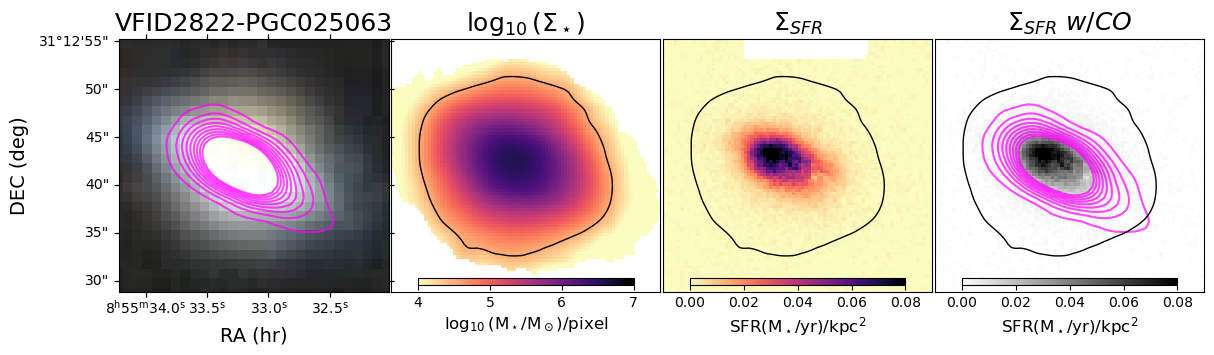

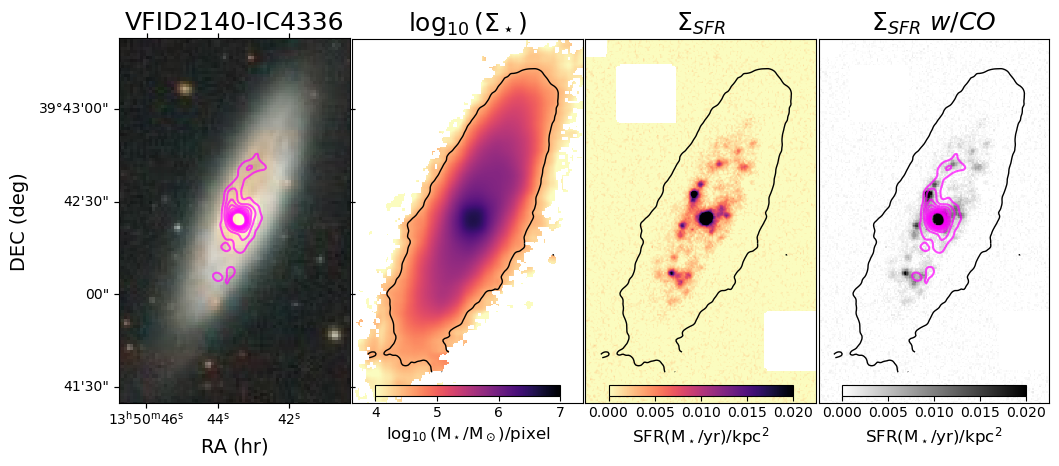

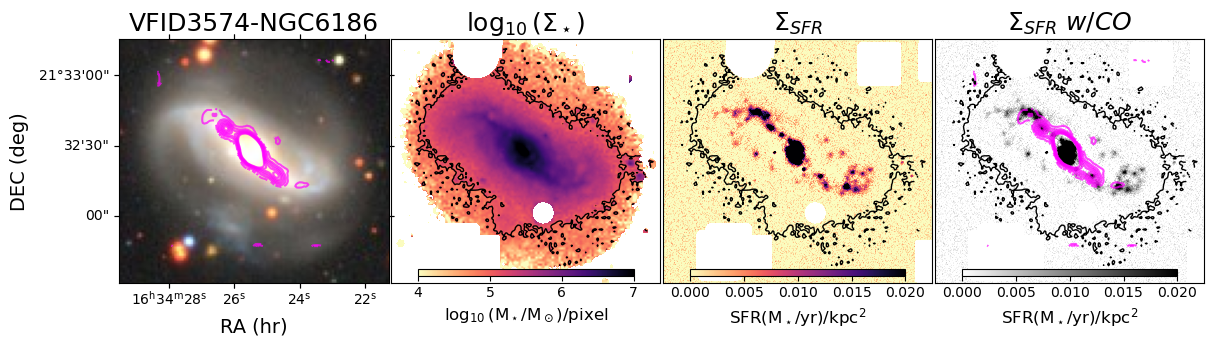

In [52]:
#from scipy.integrate import simpson
import os
%run ~/github/Virgo/programs/readtablesv2.py
%run ~/github/havirgo/python/hafunctions.py

os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')

scales = {'VFID5842':1.06,'VFID5844':1.03,'VFID5851':1,'VFID5855':1.07,
         'VFID5859':1.1,'VFID5869':1.0,'VFID5879':.99,'VFID5889':1.0,'VFID5892':0.98}

rmax_dict = {'VFID5851':160,'VFID5842':120.,'VFID5859':20,'VFID5892':100,\
             'VFID5855':150,'VFID5889':220,'VFID5844':30,'VFID5879':40,\
             'VFID6018':100,'VFID6033':100,'VFID6091':100,'VFID6362':100,'VFID5709':100,\
            'VFID2140':100,'VFID2822':100,'VFID3574':100}
#rmax = [160,120,20,100,200,220]


alldirs = ['VFID5855-NGC5348-INT-20190206-p120',\
          'VFID5842-NGC5356-INT-20190206-p120',\
          'VFID6018-NGC5560-INT-20190208-p131',\
          'VFID6033-NGC5566-INT-20190208-p131',\
          'VFID6091-NGC5577-INT-20190207-p134',\
          'VFID6362-UGC09661-BOK-20210418-VFID6406',\
          'VFID6362-UGC09661-MOS-20110404-NGC5846_02']

#####################
## NOEMA DIRECTORIES
#####################
alldirs = [
    'VFID2822-FBQSJ085533.2+311242-INT-20190206-p018',
    'VFID2140-IC4336-BOK-20220424-VFID2162',
    'VFID3574-NGC6186-HDI-20200229-p080'
           ]

# starts at SNR=2 and step by 1
# levels for NGC5348
# gianluca's values  [0.05647817, 0.08471726, 0.11295635, 0.14119543, 0.16943452 0.1976736, 0.22591269, 0.25415178]
COlevels = np.array([.03,0.05647817, 0.08471726, 0.11295635, 0.14119543, 0.16943452, 0.1976736, 0.22591269, 0.25415178])

#COlevels = np.array([0.026,.04,.078,.2,0.557371, 1.08861,1.61986,2.1511])#, 0.11295635, 0.14119543, 0.16943452, 0.1976736, 0.22591269, 0.25415178])

#COlevels = np.array([.06,.078,.2,0.557371, 1.08861,1.61986,2.1511])#, 0.11295635, 0.14119543, 0.16943452, 0.1976736, 0.22591269, 0.25415178])
COlevels = np.array([.06,.2,0.557371, 1.08861,1.61986,2.1511])

COlevels = np.array([.2,0.557371, 1.08861,1.61986,2.1511])
for k,d in enumerate(alldirs):
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    print("\n####################################'")
    print(d.split('-')[0])
    print("####################################'")  
    print()
    #%run ~/github/havirgo/python/make_mstar_image.py $d 
    #print("rmax = ",i,rmax[i])
    vfid = d.split('-')[0]

    # get contour levels that Gianluca used
    COlevels = get_CO_contour_levels(vfid)
    
    vr = v.env['Vcosmic'][v.main['VFID'] == vfid][0]
    logMstar = v.magphys['logMstar_med'][v.main['VFID'] == vfid][0]
    if logMstar < 0.1:
        logMstar = v.magphys['logMstar_best'][v.main['VFID'] == vfid][0]
    print(logMstar)
    logMstar_string = f"{logMstar:.1f}"
    print(f"logMstar = {logMstar_string}")

    cocolor='magenta'
    #cocolor='chartreuse'
    objname = v.main['objname'][v.main['VFID'] == vfid][0]
    alt_title = f"{vfid}-{objname}"
    if vfid == 'VFID2822':
        sfr_limits = [0,.08]
    else:
        sfr_limits = None
    #sfr_limits = None
    #plot_mstar_sfr_COall(d,rmax=rmax_dict[vfid],vr=vr,logMstar=logMstar_string,COcolor=cocolor,COlevels=COlevels)
    plot_mstar_sfr_CO(d,vr=vr,rmax=rmax_dict[vfid],logMstar=logMstar_string,COcolor=cocolor,COlevels=COlevels,noHI=True,alt_title=alt_title, sfr_limits=sfr_limits)
plt.show()


# Next Time
* get CO levels from gianluca's fig 2 in overleaf
* make depletion maps
* incorporate the rms maps into upper limits for alma sources

# Depletion Maps

table directory =  /Users/rfinn/research/Virgo/tables-north/v2/
number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial


<Figure size 640x480 with 0 Axes>


####################################'
VFID2822
####################################'

9.277
logMstar = 9.3
VFID =  VFID2822
pix scale in input image = 0.33
Flux ratio (out/in): 3.453358633518925
sum of original = 5.861e-02, reprojected = nan

Testing: xmax,ymax=256,256, x1,x2,y1,y2=(89, 166, 89, 166)
Testing: size_ratio=1.00 10 8

####################################'
VFID2140
####################################'

9.852
logMstar = 9.9
VFID =  VFID2140
pix scale in input image = 0.45
Flux ratio (out/in): 0.5937076455312511
sum of original = 3.299e-01, reprojected = 1.065e-01

Testing: xmax,ymax=256,256, x1,x2,y1,y2=(64, 192, 64, 192)
Testing: size_ratio=1.00 10 8

####################################'
VFID3574
####################################'

10.4
logMstar = 10.4
VFID =  VFID3574
pix scale in input image = 0.43
Flux ratio (out/in): 0.5136920684915416
sum of original = 1.881e+00, reprojected = 4.455e-01

Testing: xmax,ymax=128,128, x1,x2,y1,y2=(22, 105, 25, 102)
Testing: size_rat

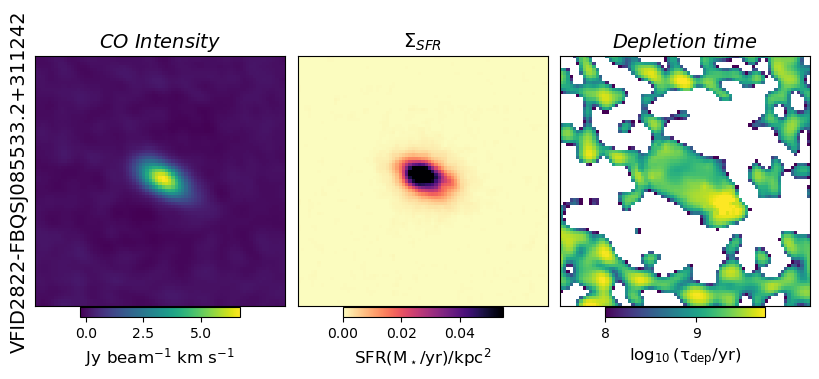

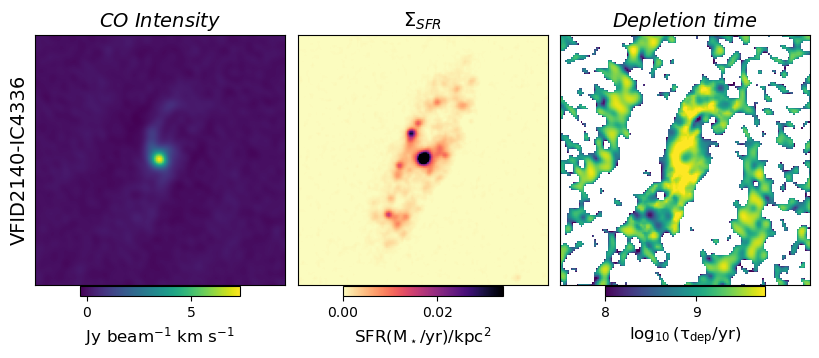

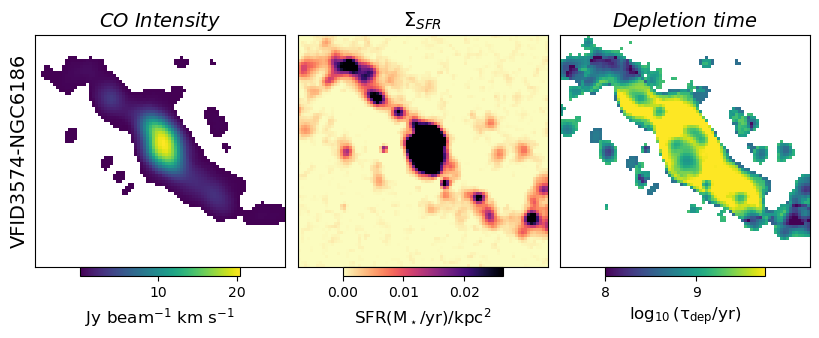

In [18]:
#from scipy.integrate import simpson
import os
%run ~/github/Virgo/programs/readtablesv2.py
%run ~/github/havirgo/python/hafunctions.py

os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')


scales = {'VFID5842':1.06,'VFID5844':1.03,'VFID5851':1,'VFID5855':1.07,
         'VFID5859':1.1,'VFID5869':1.0,'VFID5879':.99,'VFID5889':1.0,'VFID5892':0.98}

rmax_dict = {'VFID5851':160,'VFID5842':120.,'VFID5859':20,'VFID5892':100,\
             'VFID5855':150,'VFID5889':220,'VFID5844':30,'VFID5879':40,\
             'VFID6018':100,'VFID6033':100,'VFID6091':100,'VFID6362':100,'VFID5709':100}
#rmax = [160,120,20,100,200,220]


alldirs = [
          'VFID5855-NGC5348-INT-20190206-p120',\
          'VFID5842-NGC5356-INT-20190206-p120',\
          'VFID5709-NGC5470-INT-20220505-VFID5726',\
          'VFID6018-NGC5560-INT-20190208-p131',\
          'VFID6033-NGC5566-INT-20190208-p131',\
          'VFID6091-NGC5577-INT-20190207-p134',\
          'VFID6362-UGC09661-BOK-20210418-VFID6406',\

]

# testing for VFID5855 after updating the mask
alldirs = [
    'VFID5855-NGC5348-INT-20190206-p120',
    'VFID5842-NGC5356-INT-20190206-p120',
           ]

alldirs = [
    'VFID5855-NGC5348-INT-20190206-p120',
           ]


alldirs = [
          'VFID5855-NGC5348-INT-20190206-p120',\
          'VFID5842-NGC5356-INT-20190206-p120',\
          'VFID5709-NGC5470-INT-20220505-VFID5726',\
          'VFID6018-NGC5560-INT-20190208-p131',\
          'VFID6033-NGC5566-INT-20190208-p131',\
          'VFID6091-NGC5577-INT-20190207-p134',\
          'VFID6362-UGC09661-BOK-20210418-VFID6406',\
]

alldirs = [
    'VFID2822-FBQSJ085533.2+311242-INT-20190206-p018',
    'VFID2140-IC4336-BOK-20220424-VFID2162',
    'VFID3574-NGC6186-HDI-20200229-p080'
           ]


# testing for VFID5855 after updating the mask
#alldirs = [
#    'VFID5842-NGC5356-INT-20190206-p120',\
#    'VFID6033-NGC5566-INT-20190208-p131'
#           ]

# starts at SNR=2 and step by 1
# levels for NGC5348
# gianluca's values  [0.05647817, 0.08471726, 0.11295635, 0.14119543, 0.16943452 0.1976736, 0.22591269, 0.25415178]
COlevels = np.array([.03,0.05647817, 0.08471726, 0.11295635, 0.14119543, 0.16943452, 0.1976736, 0.22591269, 0.25415178])

#COlevels = np.array([0.026,.04,.078,.2,0.557371, 1.08861,1.61986,2.1511])#, 0.11295635, 0.14119543, 0.16943452, 0.1976736, 0.22591269, 0.25415178])

#COlevels = np.array([.06,.078,.2,0.557371, 1.08861,1.61986,2.1511])#, 0.11295635, 0.14119543, 0.16943452, 0.1976736, 0.22591269, 0.25415178])
COlevels = np.array([.06,.2,0.557371, 1.08861,1.61986,2.1511])


for k,d in enumerate(alldirs):
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    print("\n####################################'")
    print(d.split('-')[0])
    print("####################################'")  
    print()
    #%run ~/github/havirgo/python/make_mstar_image.py $d 
    #print("rmax = ",i,rmax[i])
    vfid = d.split('-')[0]

    vr = v.env['Vcosmic'][v.main['VFID'] == vfid][0]
    logMstar = v.magphys['logMstar_med'][v.main['VFID'] == vfid][0]
    if logMstar < 0.1:
        logMstar = v.magphys['logMstar_best'][v.main['VFID'] == vfid][0]
    print(logMstar)
    logMstar_string = f"{logMstar:.1f}"
    print(f"logMstar = {logMstar_string}")

    cocolor='magenta'
    #cocolor='chartreuse'
    get_depletion_map(d, vr=vr, sfr_limit=5e-4, verbose=False) #,rmax=rmax_dict[vfid],vr=vr,logMstar=logMstar_string,COcolor=cocolor,COlevels=COlevels)
plt.show()
